In [121]:
!wget https://raw.githubusercontent.com/bamartin1618/1WeekDataset/main/COVID-19Responses.csv

--2022-07-27 21:06:24--  https://raw.githubusercontent.com/bamartin1618/1WeekDataset/main/COVID-19Responses.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144782 (141K) [text/plain]
Saving to: ‘COVID-19Responses.csv.13’

COVID-19Responses.c 100%[===================>] 141.39K  --.-KB/s    in 0.002s  

2022-07-27 21:06:24 (84.0 MB/s) - ‘COVID-19Responses.csv.13’ saved [144782/144782]



In [122]:
!pip3 install plotly
!pip3 install statsmodels

In [123]:
import pandas
dataset = pandas.read_csv('https://raw.githubusercontent.com/bamartin1618/1WeekDataset/main/COVID-19Responses.csv')
dataset.head()

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


In [124]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1158 non-null   object 
 5   Medium for online class                                                             1131 non-null

In [125]:
dataset.columns

Index(['ID', 'Region of residence', 'Age of Subject',
       'Time spent on Online Class', 'Rating of Online Class experience',
       'Medium for online class', 'Time spent on self study',
       'Time spent on fitness', 'Time spent on sleep',
       'Time spent on social media', 'Prefered social media platform',
       'Time spent on TV', 'Number of meals per day', 'Change in your weight',
       'Health issue during lockdown', 'Stress busters', 'Time utilized',
       'Do you find yourself more connected with your family, close friends , relatives  ?',
       'What you miss the most'],
      dtype='object')

In [126]:
dataset[dataset.columns[5]] = dataset[dataset.columns[5]].fillna(dataset[dataset.columns[5]].mode()[0])
dataset[dataset.columns[4]] = dataset[dataset.columns[4]].fillna(dataset[dataset.columns[4]].mode()[0])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1182 non-null   object 
 5   Medium for online class                                                             1182 non-null

In [127]:
dataset.describe()

,Age of Subject,Time spent on Online Class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Number of meals per day
count,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000
mean,20.165821,3.208841,2.911591,0.765821,7.871235,2.365694,2.917936
std,5.516467,2.101756,2.140590,0.724451,1.615762,1.767336,0.828698
min,7.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000
25%,17.000000,2.000000,2.000000,0.000000,7.000000,1.000000,2.000000
50%,20.000000,3.000000,2.000000,1.000000,8.000000,2.000000,3.000000
75%,21.000000,5.000000,4.000000,1.000000,9.000000,3.000000,3.000000
max,59.000000,10.000000,18.000000,5.000000,15.000000,10.000000,8.000000


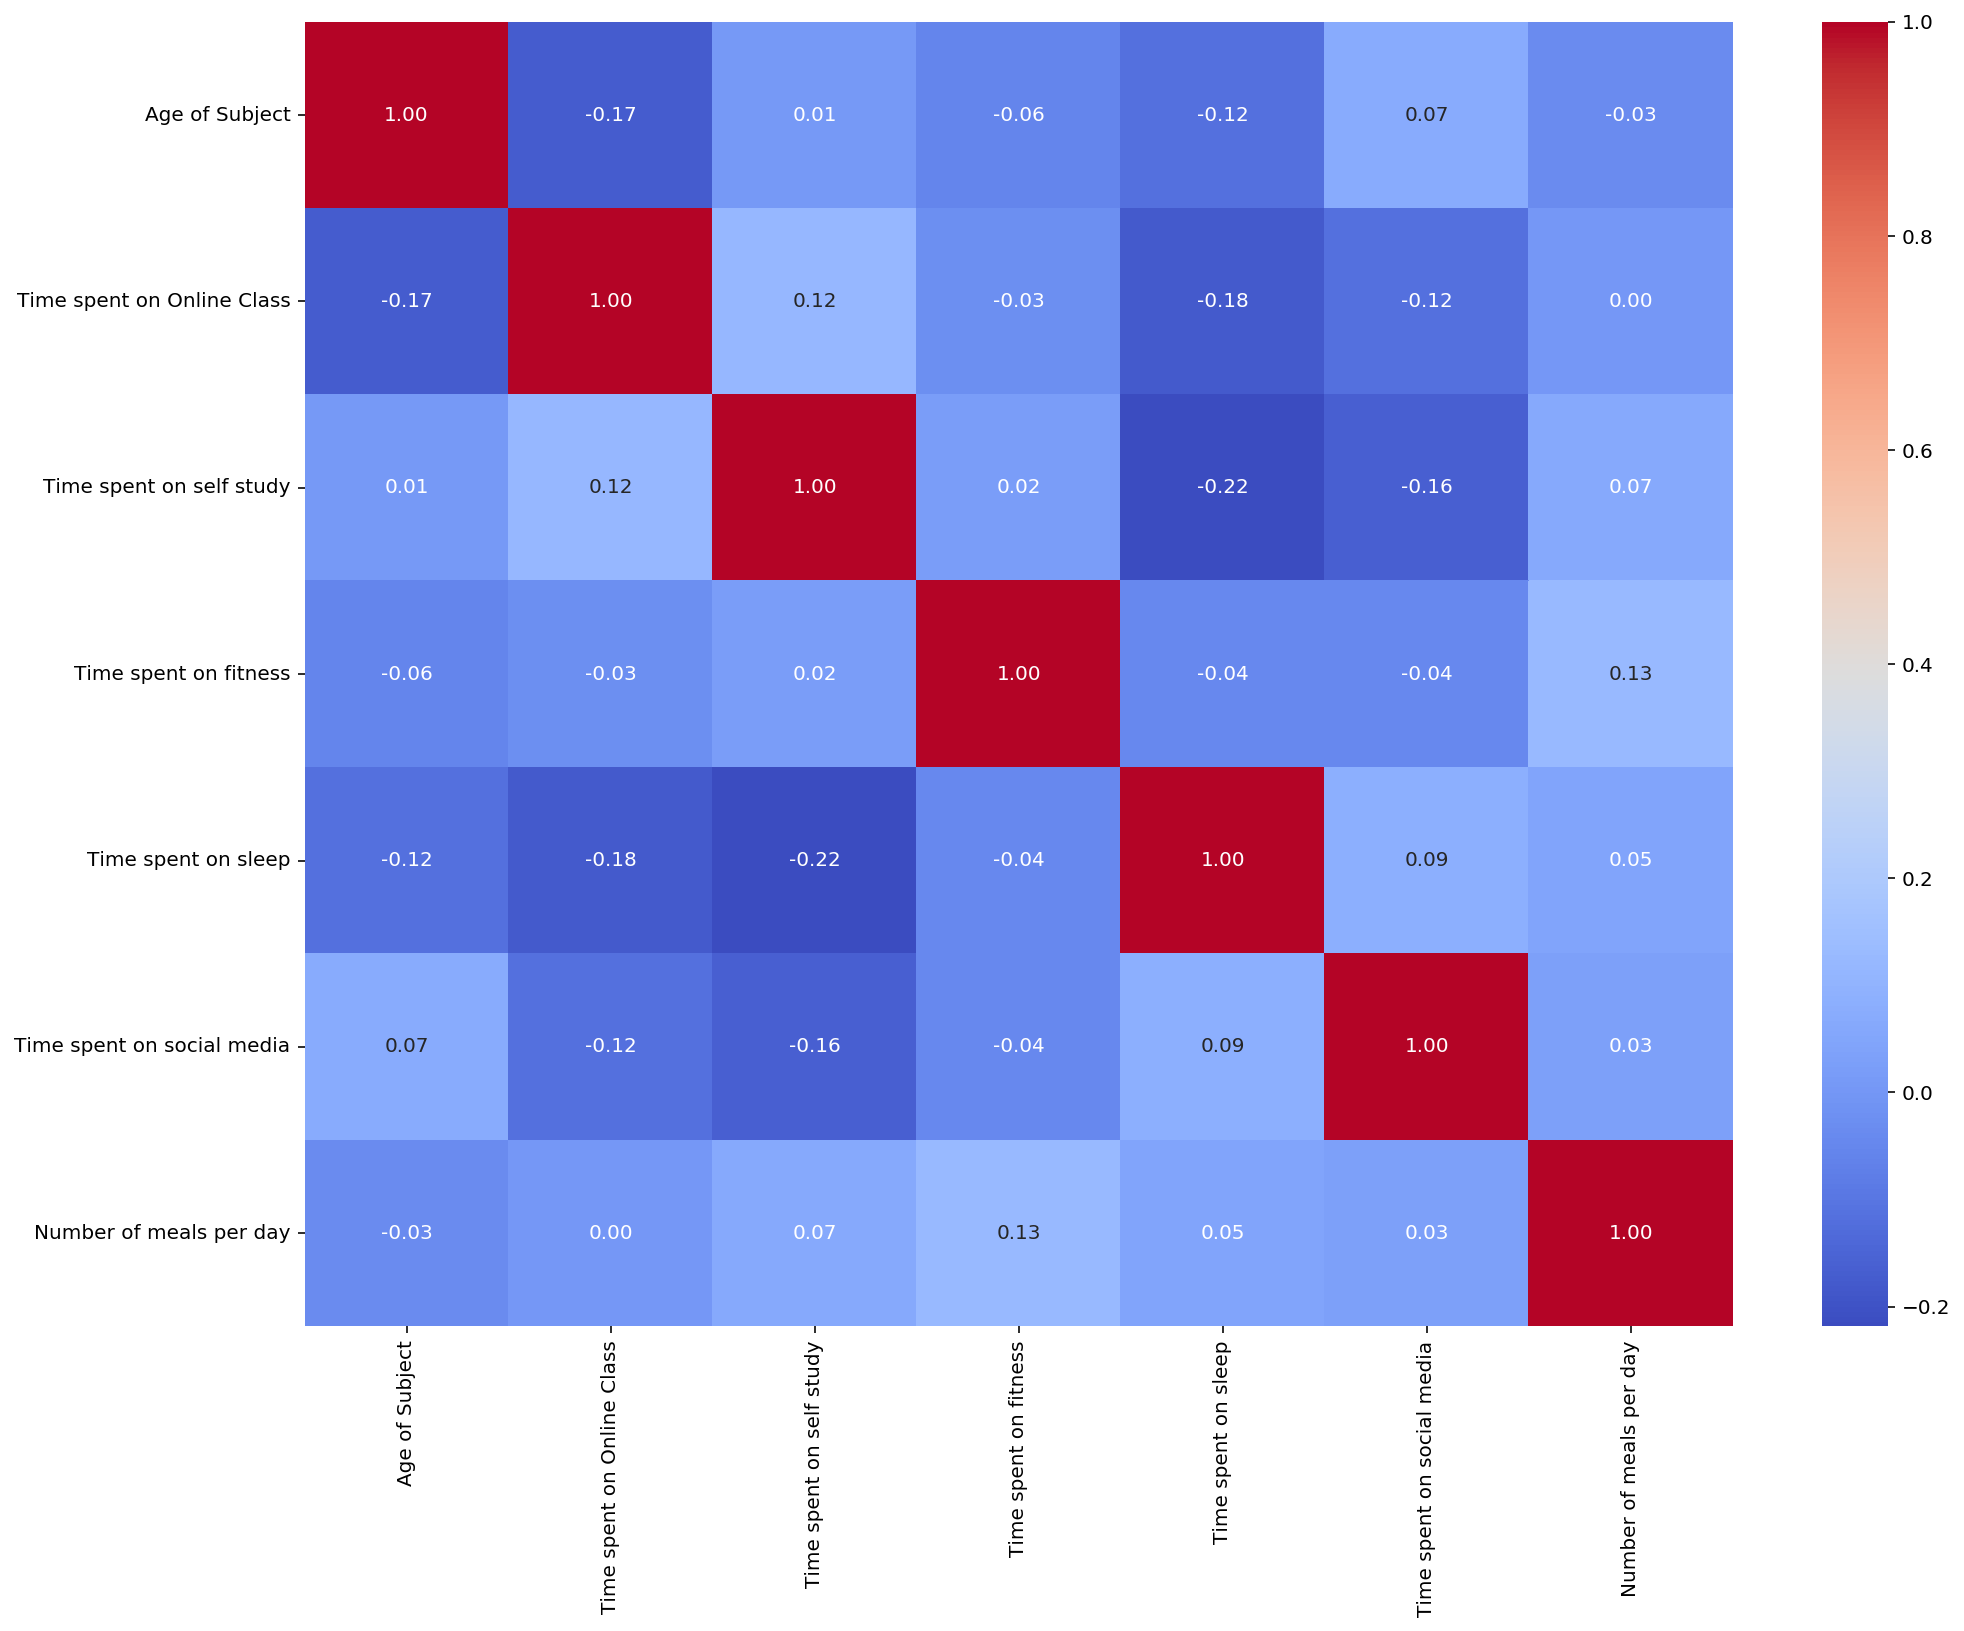

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,12))
sns.heatmap(data=dataset.iloc[:,:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()


In [129]:
import plotly.express as px

px.scatter(dataset, dataset.columns[6], dataset.columns[9], trendline = 'ols', title = 'Self Study Versus Social Media')

In [130]:
bar_graph_data = dataset[[dataset.columns[4], dataset.columns[-2]]]
bar_graph_data

,Rating of Online Class experience,"Do you find yourself more connected with your family, close friends , relatives ?"
0,Good,YES
1,Excellent,NO
2,Very poor,YES
3,Very poor,NO
4,Good,NO
...,...,...
1177,Good,YES
1178,Average,YES
1179,Average,YES
1180,Excellent,YES


In [131]:

bar_graph_data = dataset[[dataset.columns[4], dataset.columns[-2]]]
bar_graph_data[bar_graph_data.columns[0]] = bar_graph_data[bar_graph_data.columns[0]].replace({
        'Very poor': 0,
        'Poor': 1,
        'Average': 2,
        'Good': 3,
        'Excellent': 4,
    })

dataset[dataset.columns[4]] = dataset[dataset.columns[4]].replace({
        'Very poor': 0,
        'Poor': 1,
        'Average': 2,
        'Good': 3,
        'Excellent': 4,
})


bar_graph_data



<ipython-input-131-9b357ff1cad9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Rating of Online Class experience,"Do you find yourself more connected with your family, close friends , relatives ?"
0,3,YES
1,4,NO
2,0,YES
3,0,NO
4,3,NO
...,...,...
1177,3,YES
1178,2,YES
1179,2,YES
1180,4,YES


In [132]:
bar_graph_data = bar_graph_data.groupby(bar_graph_data.columns[1]).mean()
bar_graph_data['Connections'] = bar_graph_data.index
bar_graph_data

,Rating of Online Class experience,Connections
"Do you find yourself more connected with your family, close friends , relatives ?",,
NO,1.225071,NO
YES,1.752106,YES


In [133]:
px.bar(bar_graph_data, bar_graph_data.columns[1], bar_graph_data.columns[0], bar_graph_data.columns[0])

In [134]:
scatterplot_data = dataset[[dataset.columns[2], dataset.columns[8]]]
scatterplot_data = scatterplot_data.groupby(scatterplot_data.columns[0]).mean()
scatterplot_data['Age of Subject'] = scatterplot_data.index
scatterplot_data

,Time spent on sleep,Age of Subject
Age of Subject,,
7,9.000000,7
8,6.500000,8
9,7.500000,9
10,8.500000,10
11,10.500000,11
12,8.275862,12
13,8.062500,13
14,8.443750,14
15,7.675676,15


In [135]:
px.scatter(scatterplot_data, scatterplot_data.columns[1], scatterplot_data.columns[0], trendline = 'ols', title = 'Age Versus Sleep Time')


In [136]:
bar_graph_data = dataset[[dataset.columns[7], dataset.columns[13]]]
bar_graph_data = bar_graph_data.groupby(bar_graph_data.columns[1]).mean()

bar_graph_data['Weight Change'] = bar_graph_data.index

bar_graph_data

,Time spent on fitness,Weight Change
Change in your weight,,
Decreased,0.946890,Decreased
Increased,0.680594,Increased
Remain Constant,0.764860,Remain Constant


In [137]:
px.bar(bar_graph_data, bar_graph_data.columns[1], bar_graph_data.columns[0], bar_graph_data.columns[0])

In [138]:
bar_graph_data = dataset[[dataset.columns[4], dataset.columns[5]]]
bar_graph_data = bar_graph_data.groupby(bar_graph_data.columns[1]).mean()

bar_graph_data['Gadget'] = bar_graph_data.index

bar_graph_data

,Rating of Online Class experience,Gadget
Medium for online class,,
Any Gadget,2.200000,Any Gadget
Laptop/Desktop,1.610738,Laptop/Desktop
Smartphone,1.530612,Smartphone
Smartphone or Laptop/Desktop,2.800000,Smartphone or Laptop/Desktop
Tablet,2.054054,Tablet


In [139]:
px.bar(bar_graph_data, bar_graph_data.columns[1], bar_graph_data.columns[0], bar_graph_data.columns[0])

In [140]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1182 non-null   int64  
 5   Medium for online class                                                             1182 non-null

In [141]:
bar_graph_data = dataset[[dataset.columns[3], dataset.columns[13]]]

bar_graph_data = bar_graph_data.groupby(bar_graph_data.columns[1]).mean()

bar_graph_data['Weight Change'] = bar_graph_data.index

bar_graph_data

,Time spent on Online Class,Weight Change
Change in your weight,,
Decreased,3.245215,Decreased
Increased,3.006393,Increased
Remain Constant,3.360374,Remain Constant


In [142]:
px.bar(bar_graph_data, bar_graph_data.columns[1], bar_graph_data.columns[0], range_color=(3, 4), color_continuous_scale="Rainbow", color = bar_graph_data.columns[0])
